## Joining Methods (25 points)

In [2]:
#import packages here
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

#### As was explained during the lectures, engineering design of joints should take into consideration pros and cons of each joining method, applied to the specific case we are trying to explore.
#### Many factors are monitored as design criteria, such as: needed shear strength, necessity for removal to perform inspection and maintenance, lightweight design requirements, possible stress concentrations, desired failure modes, etc.
#### Overall, understanding the joining of reinforced polymers is essential to obtain proper structural integrity and sufficient service life. Therefore, several aspects of joining methods will be considered and analysed in this notebook, specifically regarding bonded joints and thermoplastic composites (TPC) joining.


#### NOTE
#### For the following questions it is essential for you to keep in mind the two main models you will be considering to evaluate peak shear stresses in bonded joints (Klein, B., Gänsicke, T. (2019). Fügetechniken. In: Leichtbau-Konstruktion. Springer Vieweg, Wiesbaden. https://doi.org/10.1007/978-3-658-26846-6_22):
#### Klein model:
 $$\tau(x)  = \frac{\omega \cdot \tau_{m}}{(\beta+2) \cdot (cosh \omega -1)} \cdot [sinh(\omega(1-\frac{x}{l_{u}})) + (\beta + 1) \cdot sinh(\omega \cdot \frac{x}{l_{u}})] $$
$$\omega  =  \sqrt \frac{G_{Kl} \cdot (E1 \cdot t1 + E2 \cdot t2) \cdot l_{u}^{2} }{E1 \cdot t1 \cdot E2 \cdot t2 \cdot d}  $$
$$\beta  =  \sqrt \frac{G_{Kl} \cdot (E2 \cdot t2 - E1 \cdot t1) \cdot l_{u}^{2} }{E1 \cdot t1 \cdot (G_{Kl} \cdot l_{u}^{2} + E2 \cdot t2 \cdot d) }  $$
Where:
$\tau_{m}$ = average shear stess
$E1$, $E2$ = adherends' Young's moduli 
$t1$, $t2$ = adherends' thicknesses
$ l_{u}$ = overlap length
$G_{Kl}$ = adhesive shear modulus
$d$ = adhesive thickness
####  Volkersen model for the adhesive peak shear:
 $$\tau_{Kmax}  = \frac{F_{10}}{b} \cdot \sqrt{\frac{1}{2} \cdot \frac{1}{E \cdot t} \cdot \frac{G_{K}}{t_{K}}}  $$
 Where:
 $F_{10}$ = applied tensile load
 $b$ = overlap length
 $E$ = adherends' Young's modulus
 $t$ =  adherends' thickness
 $G_{K}$ = adhesive shear modulus
 $t_{K}$ = adhesive thickness

### Question 1 (5 points)

#### Question 1.1: Two carbon fibre reinforced composite parts are to be adhesively bonded, as shown in the figure below. The following information is provided: Adherends' Young's modulus = 70 GPa, adherends' thickness = 2 mm, adherends' width = 20 mm, adhesive shear modulus = 2.0 GPa, adhesive thickness = 0.3 mm, overlap length = 30 mm. The bonded part will be subjected to a tensile load of 50 kN.

#### - In the lecture you learned about the shear-stress distribution of such a joint. Plot the shear stress distribution over the lap joint for several overlap lengths (including at least: 10, 15, 20, 30, and 50 mm) according to the Klein model. Comment on the results.

#### - Then, repeat the exercise using the Volkersen model instead. What are the most notable differences?

![title](lapjoint.png)

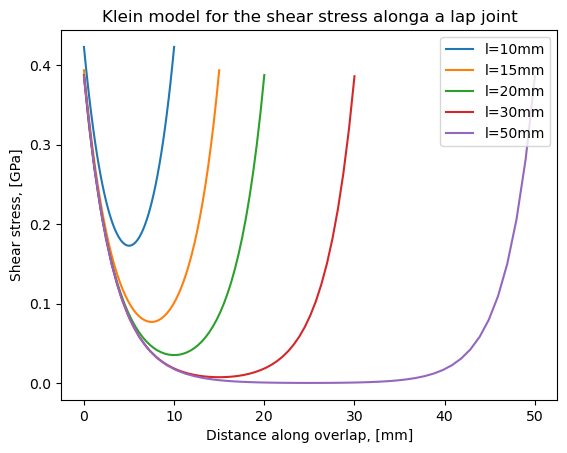

In [22]:
E1 = 70e9   # Adherends Youngs modulus [Pa]
t1 = 2e-3   # Adherends thickness [m]
# w = 20e-3   # Adherends width [m]
Gk = 2.0e9  # Adhesive shear modulus [Pa]
d = 0.3e-3  # Adhesive thickness [m]

x_list = []
tau_list = []
max_tau_list = []

lu = [10e-3, 15e-3, 20e-3, 30e-3, 50e-3] # overlap length [m]
for l in lu:
    omega = np.sqrt(Gk*(2*E1*t1)*l**2/(E1**2*t1**2*d))
    beta = 0  # because we have the same adherents (E1-E2 and t1=t2) the part within brackets cancels out
    x = np.linspace(0,l)
    tau_m = 50e3/(20e-3*l)
    tau = omega*tau_m/(2*(np.cosh(omega)-1))*(np.sinh(omega*(1-x/l))+np.sinh(omega*x/l))
    x_list.append(x)
    tau_list.append(tau)
    max_tau_list.append(max(tau)*1e-9)

plt.plot(x_list[0]*1e3,tau_list[0]*1e-9, label='l=10mm')
plt.plot(x_list[1]*1e3,tau_list[1]*1e-9, label='l=15mm')
plt.plot(x_list[2]*1e3,tau_list[2]*1e-9, label='l=20mm')
plt.plot(x_list[3]*1e3,tau_list[3]*1e-9, label='l=30mm')
plt.plot(x_list[4]*1e3,tau_list[4]*1e-9, label='l=50mm')
plt.ylabel('Shear stress, [GPa]')
plt.xlabel('Distance along overlap, [mm]')
plt.title('Klein model for the shear stress alonga a lap joint')
plt.legend()
plt.show()

Comments: As expected, the stress is much higher at the edges of the lap joint than in the middle. It can also be noted that while the smallest overlap has the highest peak and minimum stresses, the difference between these stresses decreases as the joint length increases. After a while, the decrease in stress is negligible and it is not longer viable to increase the length of the lap joint.

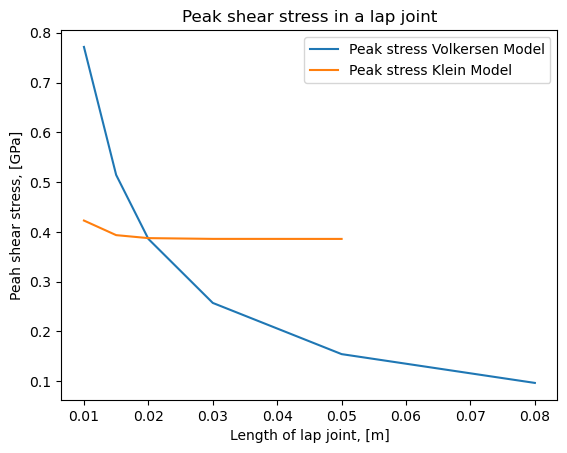

In [27]:
F = 50e3  # applied tensile load [N]
lu_new = [10e-3, 15e-3, 20e-3, 30e-3, 50e-3,80e-3] # overlap length [m]
tk_max = []
for l in lu_new:
    tk_max.append(F/l*np.sqrt(0.5*Gk/(E1*t1*d))*1e-9)

plt.plot(lu_new,tk_max, label='Peak stress Volkersen Model')
plt.plot(lu, max_tau_list, label='Peak stress Klein Model')
plt.xlabel('Length of lap joint, [m]')
plt.ylabel('Peak shear stress, [GPa]')
plt.title('Peak shear stress in a lap joint')
plt.legend()
plt.show()

Comparing the two models it is immediately evident that the reduction in peak stress with the increase in overlap length is much higher with the Volkersen model. Additionally, while the Klein model seems to have reached a plateau for lap length against peak stress by 50mm, the Volkorsen model has not. This is also clear from the model itself, as the Volkorsen will reach minumum peak shear stress with an infinte overlap length. 
The equation for the Volkersen model is much simpler than the Klein model, and this clearly shows in the ability to accurately reflect reality.

#### Question 1.2: Show how the stress distribution changes when the thickness of the bottom adherend increases to 3mm and 4mm. Create a plot. Why can you expect these shapes of the curves? Answer in the textbox below your plot. Use the Klein model.

Answer:



### Question 2 (2 points)

#### In reality, shear stresses are not the only stresses acting on the lap joint. Due to eccentricity, another type of stress occurs which will lower the maximum carrying capacity. Elaborate on this type of stress and why it affects the maximum load that can be carried.

Answer:

### Question 3 (2 points)

#### Explain how step joints and scarf joints help in increasing the maximum carrying load, compared to single lap joints. Do this by globally analyzing the differences between the 3 joint types, and how these differences result in different stresses.

Answer:

### Question 4 (5 points)

#### Question 4.1: The number of steps $n$ in a step joint has an effect on the shear-stress distribution in the bonded part. Write a function that takes the number of steps of the step joint as input, and returns the stress distribution over the entire bond length. Assume the steps are always equally spaced.
#### Show your results by creating a plot below, which shows $\tau$ over the given length of 30mm for different values of $n$. Assume the same material properties as in Question 1 and apply the Klein model (or other analytical models).

#### Question 4.2: What happens when $n$ approaches infinity? Plot this using your code from question 4.1. Is there another type of joint that it would resemble? 

### Question 5 (6 points)

#### Question 5.1: Consider the scarf joint from the image below. Write a function that takes angle $\alpha$ as input and returns the shear- and tensile stresses in the adhesive. Then, use your function to plot the shear- and tensile stresses vs $\alpha$ for $0^{\circ} <\alpha<90 ^{\circ} $

#### The thickness $t$ of the part is 20 mm, the width $b$ is 30 mm. The part is subjected to a tensile force of 10 kN.

![title](scarfjoint.png)

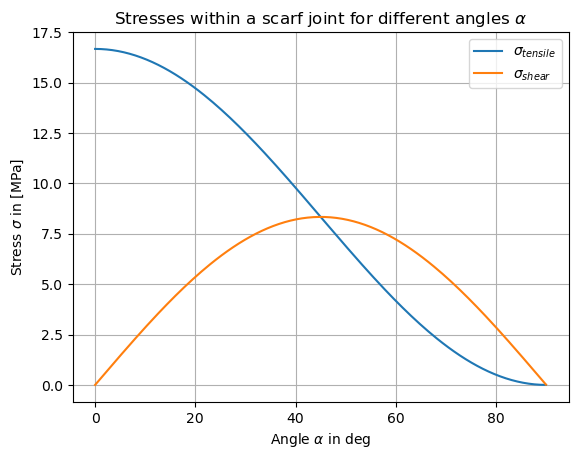

In [45]:
thickness = 0.02
width     = 0.03
Force     = 10000

alpha = np.arange(0,np.pi/2,0.01)
Barea = np.zeros(len(alpha))
SigmaTensile = np.zeros(len(alpha))
SigmaShear   = np.zeros(len(alpha))

for i in range(len(alpha)):
    Ftensile = Force*np.cos(alpha[i])
    Fshear   = Force*np.sin(alpha[i])
    beta = np.pi/2 - alpha[i]
    Lthickness = thickness/np.sin(beta)
    Barea[i] = Lthickness*width
    SigmaTensile[i] = Ftensile/Barea[i]
    SigmaShear[i]   = Fshear/Barea[i]
    

plt.figure()
plt.plot(np.rad2deg(alpha),SigmaTensile/1e6,label=r"$\sigma_{tensile}$")
plt.plot(np.rad2deg(alpha),SigmaShear/1e6,label=r"$\sigma_{shear}$")
plt.legend()
plt.grid()
plt.xlabel(r"Angle $\alpha$ in deg")
plt.ylabel(r"Stress $\sigma$ in [MPa]")
plt.title(r"Stresses within a scarf joint for different angles $\alpha$")
plt.show()


#### Question 5.2: At which value for $\alpha$ does the tensile stress peak? At which value for $\alpha$ does the shear stress peak? Explain why this makes sense. Plot a graph, which contains bond-area vs. $\alpha$, to support your explanation.

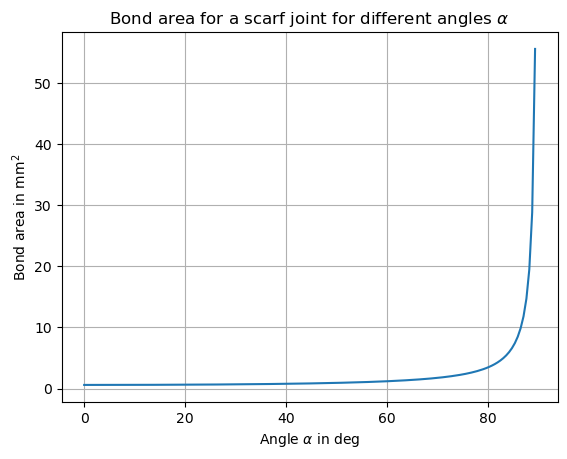

In [44]:
plt.figure()
plt.plot(np.rad2deg(alpha[:-1]),Barea[:-1]*1e3)
plt.grid()
plt.xlabel(r"Angle $\alpha$ in deg")
plt.ylabel(r"Bond area in mm$^2$")

plt.title(r"Bond area for a scarf joint for different angles $\alpha$")
plt.show()

As can be seen from the graphs plotting the tensile and shear stresses for different values of $\alpha$, the tensile stress peaks at $\alpha = 0^\circ$, whereas the shear stress peaks at a value of $\alpha = 45^\circ$

This is due to the fact that the bond area is highly dependent on the scarf angle $\alpha$, as demonstrated in the graph above. As $\alpha$ approaches $90^\circ$, the bond area goes to infinity, as if it were to become a lap joint. This counteracts the increase in shear __force__ for higher values of $\alpha$, thus causing the shear __stress__ to peak at an angle of $45^\circ$

## Joining of thermoplastic composite parts

#### As introduced during lectures, the main advantages of TPC joining via fusion bonding are potential weight reduction, avoidance of drilling induced delaminations and stress concentrations, less labour compared to mechanical fastening. Compared to adhesive bonding, surface treatments are not needed and the process of joining can be sped up dramatically. 
#### The process of fusion bonding entails the use of localized heating in specific areas intended for bonding, followed by a cool down under the application of pressure. After consolidation, this process creates a weld between the surfaces with no visible weld line. To achieve a successful bond, it is necessary to heat the interface above certain temperature thresholds: the glass transition temperature (Tg) for amorphous polymers and the melting temperature (Tm) for semi-crystalline polymers. Additionally, throughout this bonding procedure, it is crucial to ensure that the maximum temperature does not exceed the polymer's degradation point

#### Different phases are encountered during TPC fusion bonding: intimate contact, autohesion and reptation, for which appropriate temperature, time and pressure are needed to properly consolidate the joint.
#### Autohesion, specifically, refers to the diffusion of polymer chains between contacted surfaces. A necessary and critical step in this is assuring intimate contact of the surfaces to bond. The degree of intimate contact is influenced by factors such as applied pressure, current temperature, surface texture, and polymer viscosity.
#### It is obtained through the following, simplified equation (source: Manufacturing Process Models for Thermoplastic Composites, Susan C. Mantell and George S. Springer, Journal of Composite Materials 1992 26:16, 2348-2377):
$$D_{ic} = R_c \cdot [\int_{0}^{t_p} \frac{p}{\mu} \,dt ] ^{0.2} $$
#### Where the parameter $R_c$ is the initial surface roughness of the ply (geometric factor obtained through fitting), time $t$ is expressed in seconds, $p$ is the applied pressure ($Pa$) and $\mu$ (viscosity of the resin, $Pa \cdot s$) which could follow an Arrhenius type relation with temperature: $\mu = A \cdot exp(\frac{B}{T})$ . The parameters A and B represent empirical constants, while T is the applied temperature, expressed in $K$.


### Question 6 (3 points)
#### In this question an APC-2/AS4 (Aromatic Polymer Composite) thermoplastic composite tape, provided by Solvay, has been taken into consideration. More specifically, a standard modulus continuous carbon fiber (12K) and PEEK (polyetheretherketone) impregnated prepreg.
#### The following constants are given for this material: A = 643 Ns/m^2, B = 4367 K. In the following questions we will oversimplify the use of the equation by keeping the surface roughness and pressure constant during the heating process and we will only consider the heating process. Assume $R_c = 0.29$ (or specify a more suitable value derived from assumptions or from a source you found, but in any case specify any assumptions and/or resource you may be using). Use an appropriate timescale for the graphs.
#### Question 6.1: Using the provided information, calculate the degree of intimate contact $D_{ic}$ for three different applied pressures: 0.5 MPa, 1 MPa, 1.5 MPa at a constant temperature T=300°C, applied for 430 s.
#### Question 6.2: Using the provided information, calculate the degree of intimate contact $D_{ic}$ for two different cure cycles: from room temperature up to 250°C, with a heating rate of 1 °C/min and a second one from RT to 350°C with a heating rate of 10 °C/min.
#### Note: Assume $R_c = 0.29$ (or specify a more suitable value derived from assumptions or from a source you found, but in any case specify any assumptions and/or resource you may be using). The maximum reachable value for degree of intimate contact is 1. Use an appropriate timescale for the graphs.

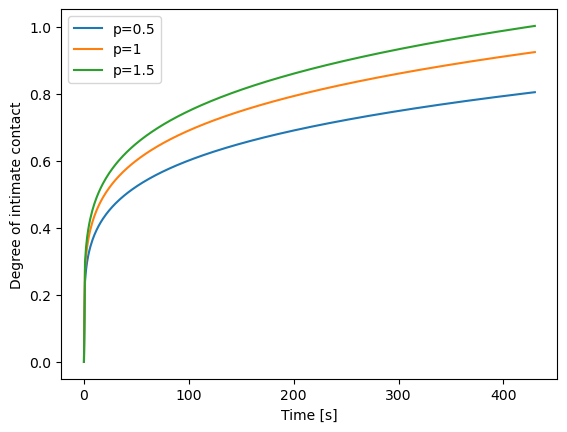

Final value of degree of intimate contact for 0.5 bar: 0.8043402061960134
Final value of degree of intimate contact for 1 bar: 0.9239442717153364
Final value of degree of intimate contact for 1.5 bar: 1.0019914808350987


In [2]:
A = 643
B = 4367
Rc = 0.29

def degreeofIC1(p, t1, T):
    integrand = lambda tau: p / (A * np.exp(B / T))
    result, _ = quad(integrand, 0, t1)
    Dic1 = Rc * (result ** 0.2)
    return Dic1

p1 = 0.5 * 10**6
p2 = 1 * 10**6
p3 = 1.5 * 10**6
T1 = 300 + 273.15
time1_values = np.linspace(0, 430, 430)  # Increase the number of points for a smoother plot

Dic1_values_1 = []
Dic1_values_2 = []
Dic1_values_3 = []

for t1 in time1_values:
    Dic1_values_1.append(degreeofIC1(p1, t1, T1))
    Dic1_values_2.append(degreeofIC1(p2, t1, T1))
    Dic1_values_3.append(degreeofIC1(p3, t1, T1)) 
                                 
plt.plot(time1_values, Dic1_values_1, label='p=0.5')
plt.plot(time1_values, Dic1_values_2, label='p=1')
plt.plot(time1_values, Dic1_values_3, label='p=1.5')                                 
plt.xlabel('Time [s]')
plt.ylabel('Degree of intimate contact')
plt.legend()
plt.show()
print("Final value of degree of intimate contact for 0.5 bar:" ,Dic1_values_1[429])
print("Final value of degree of intimate contact for 1 bar:" ,Dic1_values_2[429])
print("Final value of degree of intimate contact for 1.5 bar:" ,Dic1_values_3[429])

C:\Users\joale\AppData\Local\Temp\ipykernel_19808\1530285463.py:7: RuntimeWarning: overflow encountered in exp
  integrand = lambda tau: p / (A * np.exp(B / (x*tau / 60)))
C:\Users\joale\AppData\Local\Temp\ipykernel_19808\1530285463.py:7: RuntimeWarning: overflow encountered in double_scalars
  integrand = lambda tau: p / (A * np.exp(B / (x*tau / 60)))


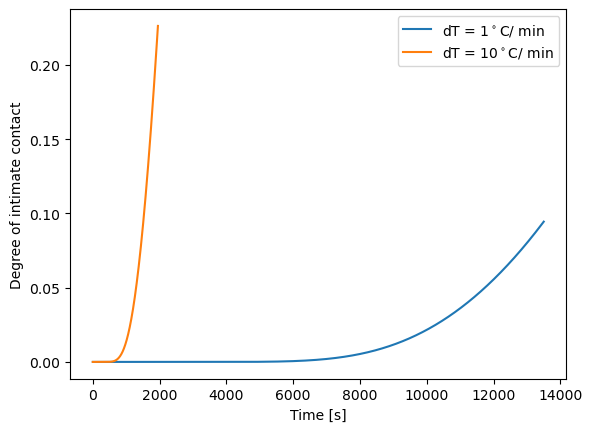

Value of degree of intimate contact for 1 ºC/min at 250 ºC: 0.09445392283399187
Value of degree of intimate contact for 10 ºC/min at 350 ºC: 0.22625289473398444


In [3]:
A = 643
B = 4367
Rc = 0.29

def degreeofIC2(x, t2):
    p = 1 * 10**6
    integrand = lambda tau: p / (A * np.exp(B / (x*tau / 60)))
    result, _ = quad(integrand, 0, t2)
    Dic2 = Rc * (result ** 0.2)
    return Dic2

time2_values = np.linspace(1, 13500, 13500)
time3_values = np.linspace(1, 1950, 1950)

Dic2_values_1 = []
Dic2_values_2 = []

for t2 in time2_values:
    Dic2_values_1.append(degreeofIC2(1, t2))
    
for t2 in time3_values:
    Dic2_values_2.append(degreeofIC2(10, t2))
    
plt.plot(time2_values, Dic2_values_1, label='dT = 1$^\circ$C/ min')
plt.plot(time3_values, Dic2_values_2, label='dT = 10$^\circ$C/ min')
plt.xlabel('Time [s]')
plt.ylabel('Degree of intimate contact')
plt.legend()
plt.show()
print("Value of degree of intimate contact for 1 ºC/min at 250 ºC:" ,Dic2_values_1[13499])
print("Value of degree of intimate contact for 10 ºC/min at 350 ºC:" ,Dic2_values_2[1949])

### Question 7 (2 points)

#### Mechanical properties (such as fracture toughness and strength at failure) of the resulting joint are highly influenced by the parameters applied during consolidation. Reflect on the influence of time, temperature and applied pressure on mechanical properties of co-consolidated parts.



Short consolidation times can lead to incomplete bonding between the parts as they are not sufficient for the molecular diffusion to occur totally. Low temperatures can also result in incomplete bonding because the energy provided for the molecular diffusion to occur may not be enough. On the other hand, excessively high temperatures may degradate the polymer composites. Insufficient pressure may lead to poor contact between the surfaces which weakens the joint and also results in the presence of voids. However, excessively high pressure can damage the materials being consolidated. For all these reasons, it is crucial to reach optimal values for the three parameters. A high degree of intimate contact with better interfacial contact and less voids and a better molecular entanglement result in consolidated parts with higher fracture toughness and strength at failure.